# Unsupervised Learning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(random_state=42)

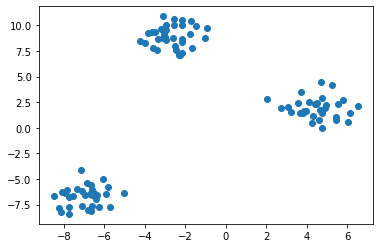

In [6]:
plt.scatter(X[:,0], X[:,1])

**Goal** Identify algorithmically the groups we see here.

In [7]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3, random_state=123)

In [28]:
labels = kmeans.fit_predict(X)

In [29]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

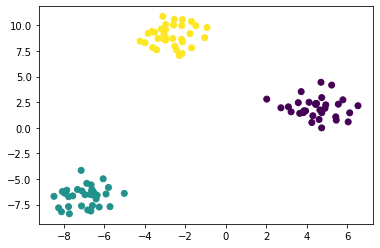

In [30]:
plt.scatter(X[:,0], X[:,1], c=labels)

## Deciding the "good" number of clusters

In [26]:
kmeans.inertia_

124.18152006772884

In [31]:
Ks = [2,3,4,5,6,7,8,9,10]
inertias = []
for k in Ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

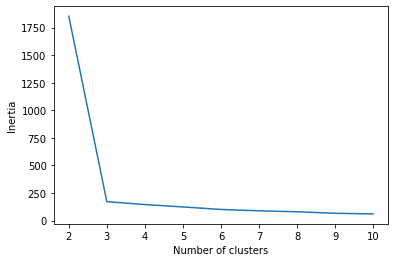

In [33]:
plt.plot(Ks,inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Making sense out of the clustering

A good way to understand what happens is to gather some descriptive statistics of the cluster.

In [36]:
import pandas as pd

In [37]:
df = pd.DataFrame(X)

In [38]:
df.head()

,0,1
0,-7.726421,-8.394957
1,5.453396,0.742305
2,-2.978672,9.556846
3,6.042673,0.571319
4,-6.521840,-6.319325


In [39]:
df['cluster'] = labels

In [41]:
df.groupby('cluster').mean()

,0,1
cluster,,
0,4.499510,1.938920
1,-6.951710,-6.676217
2,-2.667804,8.935761


In [42]:
df.groupby('cluster').std()

,0,1
cluster,,
0,0.989956,0.976786
1,0.820329,0.977991
2,0.813447,1.045077
